# Homework 4

## Problem 1

### Problem 1(d)

In [7]:
import numpy as np

def count_steps(n, err = 0.01):
    '''
    counts the number of steps needed to reach n by adding/subtracting 1/i within err
    '''
    
    i = 1
    total = 0
    while np.abs(total - n) > err:
        if total < n:
            total += 1/i
        else:
            total -= 1/i
        i += 1
        
    return i, total

count_steps(7.5, 0)

(8152, 7.5)

In [6]:
# compute sum of 1/n from n = 1 to 1016
total = 0
for i in range(1, 1016):
    total += 1/i
print(total)

7.5003520863263855


### Problem 1(e)

In [62]:
import numpy as np
import matplotlib.pyplot as plt

A1 = np.array([[10, 0], [0, 1]])
A2 = np.array([[15, 8], [6, 5]])
b = np.array([4.5, 6])
x_opt = np.linalg.inv(A1) @ b
f_opt = np.linalg.norm(A1 @ x_opt - b)
max_iter = 100000

def f(x, A, b):
    # objective function
    return np.linalg.norm(A @ x - b)

def grad_f(x, A, b):
    # gradient of ||Ax-b||
    return A.T @ (A @ x - b) / np.linalg.norm(A @ x - b)

def gd1(x0, A, b, t = 1, tol = 0.01, max_iter = max_iter):
    # fixed step size
    history = np.zeros((max_iter, 2))
    x = x0
    for i in range(max_iter):
        history[i] = x
        x = x - t * grad_f(x, A, b)
        if np.linalg.norm(f(x,A,b) - f_opt) < tol:
            print('Converged in', i, 'iterations')
            break
    if i == max_iter - 1:
        print('Did not converge')
    return x, history[:i]

def gd2(x0, A, b, gamma = 5/6, max_iter = max_iter, tol = 0.01):
    # exponential step size
    history = np.zeros((max_iter, 2))
    x = x0
    for i in range(max_iter):
        history[i] = x
        x = x - (gamma ** i) * grad_f(x, A, b)
        if np.linalg.norm(f(x,A,b) - f_opt) < tol:
            print('Converged in', i, 'iterations')
            break
    if i == max_iter - 1:
        print('Did not converge')
    return x, history[:i]

def gd3(x0, A, b, max_iter = max_iter, tol = 0.01):
    # diminishing step size
    history = np.zeros((max_iter, 2))
    x = x0
    for i in range(max_iter):
        history[i] = x
        x = x - 1/(i+1) * grad_f(x, A, b)
        if np.linalg.norm(f(x,A,b) - f_opt) < tol:
            print('Converged in', i, 'iterations')
            break
    if i == max_iter - 1:
        print('Did not converge')
    return x, history[:i]

Did not converge
x = [-4.21969358  6.        ], f(x) = 46.69693581051267, optimal x = [0.45 6.  ], optimal f(x) = 0.0


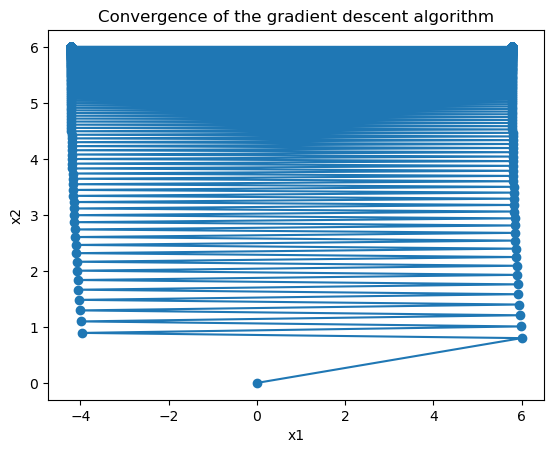

In [63]:
# plot the convergence of the gradient descent algorithm
x0 = np.array([0, 0])
x, history = gd1(x0, A1, b)
print(f'x = {x}, f(x) = {f(x, A1, b)}, optimal x = {x_opt}, optimal f(x) = {f_opt}')

plt.plot(history[:, 0], history[:, 1], 'o-')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Convergence of the gradient descent algorithm')
plt.show()

Did not converge
x = [0.44999997 2.43095698], f(x) = 3.5690430185909054, optimal x = [-0.94444444  2.33333333], optimal f(x) = 2.5121479338940403e-15


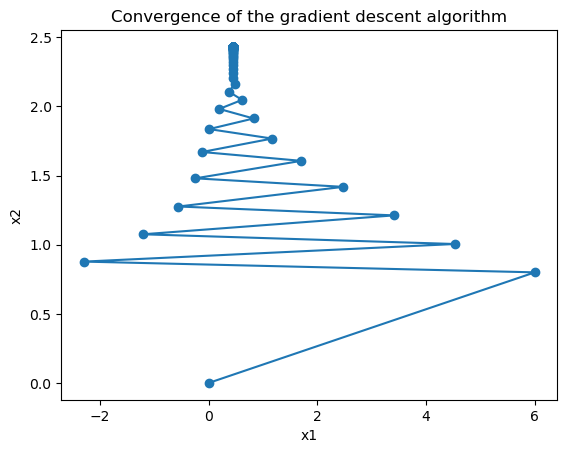

In [68]:
# plot the convergence of the gradient descent algorithm
x0 = np.array([0, 0])
x, history = gd2(x0, A1, b)
print(f'x = {x}, f(x) = {f(x, A1, b)}, optimal x = {x_opt}, optimal f(x) = {f_opt}')

plt.plot(history[:, 0], history[:, 1], 'o-')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Convergence of the gradient descent algorithm')
plt.show()

Converged in 808 iterations
x = [0.45       5.99063836], f(x) = 0.00936163761317399, optimal x = [-0.94444444  2.33333333], optimal f(x) = 2.5121479338940403e-15


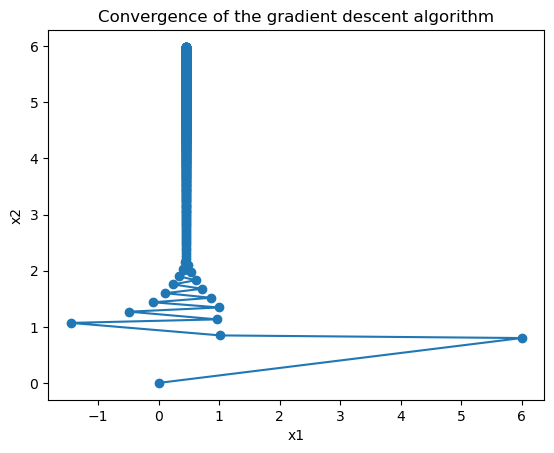

In [69]:
# plot the convergence of the gradient descent algorithm
x0 = np.array([0, 0])
x, history = gd3(x0, A1, b)
print(f'x = {x}, f(x) = {f(x, A1, b)}, optimal x = {x_opt}, optimal f(x) = {f_opt}')

plt.plot(history[:, 0], history[:, 1], 'o-')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Convergence of the gradient descent algorithm')
plt.show()

Did not converge
x = [-3.45081002  0.88123538], f(x) = 54.028497251433144, optimal x = [-0.94444444  2.33333333], optimal f(x) = 2.5121479338940403e-15


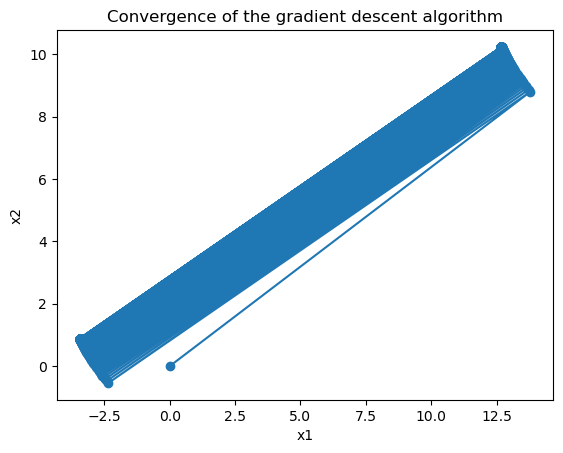

In [64]:
x_opt = np.linalg.inv(A2) @ b
f_opt = np.linalg.norm(A2 @ x_opt - b)

# plot the convergence of the gradient descent algorithm
x0 = np.array([0, 0])
x, history = gd1(x0, A2, b)
print(f'x = {x}, f(x) = {f(x, A2, b)}, optimal x = {x_opt}, optimal f(x) = {f_opt}')

plt.plot(history[:, 0], history[:, 1], 'o-')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Convergence of the gradient descent algorithm')
plt.show()

Did not converge
x = [-0.58650742  1.715523  ], f(x) = 1.0335636435402868, optimal x = [-0.94444444  2.33333333], optimal f(x) = 2.5121479338940403e-15


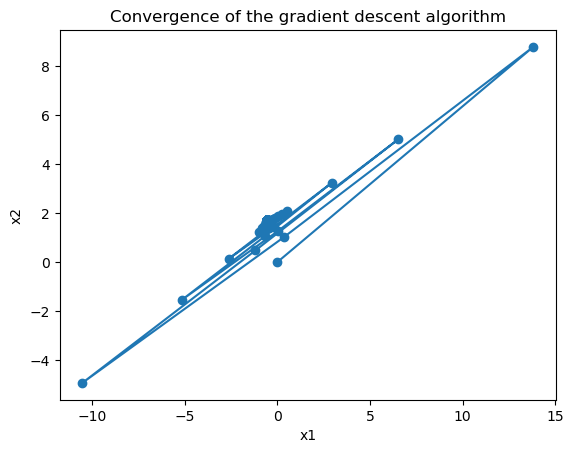

In [65]:
# plot the convergence of the gradient descent algorithm
x0 = np.array([0, 0])
x, history = gd2(x0, A2, b)
print(f'x = {x}, f(x) = {f(x, A2, b)}, optimal x = {x_opt}, optimal f(x) = {f_opt}')

plt.plot(history[:, 0], history[:, 1], 'o-')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Convergence of the gradient descent algorithm')
plt.show()

Converged in 17394 iterations
x = [-0.94490833  2.33306457], f(x) = 0.009999844720958382, optimal x = [-0.94444444  2.33333333], optimal f(x) = 2.5121479338940403e-15


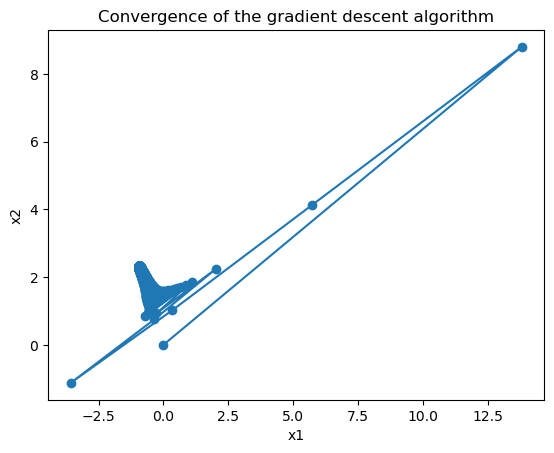

In [66]:
# plot the convergence of the gradient descent algorithm
x0 = np.array([0, 0])
x, history = gd3(x0, A2, b)
print(f'x = {x}, f(x) = {f(x, A2, b)}, optimal x = {x_opt}, optimal f(x) = {f_opt}')

plt.plot(history[:, 0], history[:, 1], 'o-')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Convergence of the gradient descent algorithm')
plt.show()

## Problem 3

[1.10291426 1.67878833 1.10291426] 0.103401292199733 11 0.0


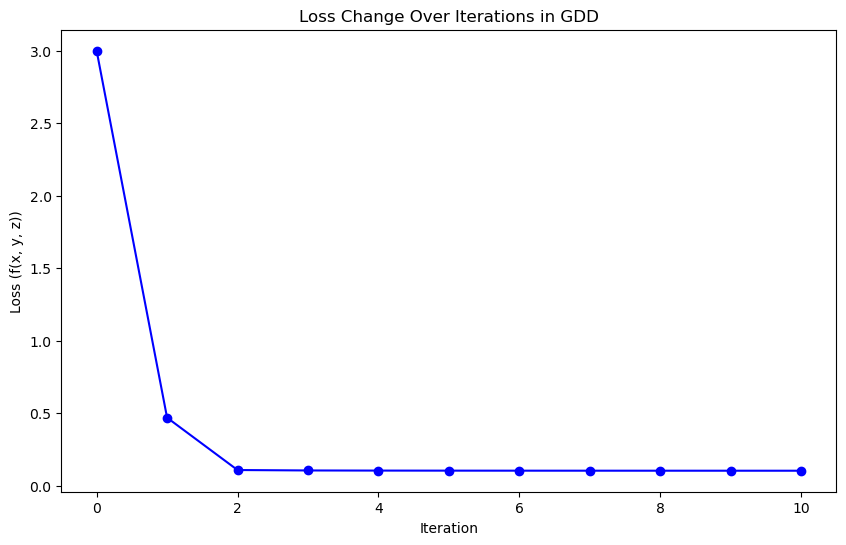

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, a, b):
    return a * (x[0] - 1)**4 + (x[1] - 2)**2 + b * (x[2] - 1)**4

def gradient_f(x, a, b):
    grad_x1 = 4 * a * (x[0] - 1)**3
    grad_x2 = 2 * (x[1] - 2)
    grad_x3 = 4 * b * (x[2] - 1)**3
    return np.array([grad_x1, grad_x2, grad_x3])

# Geometrical Gradient Descent
def GDD(x0, a, b, kappa, tol=1e-6, max_iters=10, clip_value=1e3):
    x = x0
    r_squared = np.linalg.norm(x0)**2  # Initial radius squared
    history = [x]
    iteration = 0
    
    while iteration < max_iters:
        grad = gradient_f(x, a, b)
        grad = np.clip(grad, -clip_value, clip_value)  # Gradient clipping
        norm_grad = np.linalg.norm(grad)
        
        alpha = max(1.0, norm_grad)  # Adaptive alpha to ensure stability
        
        x_plus_plus = x - (1 / alpha) * grad
        
        r_new_squared = (norm_grad**2 / alpha**2) * (1 - 1 / kappa)
        
        if norm_grad < tol:
            break
        
        x = x_plus_plus
        r_squared = r_new_squared
        history.append(x)
        iteration += 1
    
    return x, history, r_squared


a = 1.0  # a > 0
b = 1.0  # b > 0
kappa = 1  # Condition number for convergence analysis
x0 = np.array([2.0, 3.0, 2.0])  # Initial point

optimal_point, history, final_radius_sq = GDD(x0, a, b, kappa)

final_value = f(optimal_point, a, b)
print(optimal_point, final_value, len(history), final_radius_sq)

loss_values = [f(point, a, b) for point in history]

plt.figure(figsize=(10, 6))
plt.plot(loss_values, marker='o', linestyle='-', color='blue')
plt.title('Loss Change Over Iterations in GDD')
plt.xlabel('Iteration')
plt.ylabel('Loss (f(x, y, z))')
plt.show()